In [394]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from autocorrect import spell
%matplotlib inline

<H1>Frustrating Data: WELLCOME APC Spend 2013</H1>

<H4>Drill 1: Find the most common journals and the number of articles from each.</H4>

My technique: Comb through the journal titles to find the different formats of common journal titles. Compile regexes that match all these types, and replace them in a new column named "clean_journals."
I also found a handy python module that autocorrects spelling, which catches most simple typos for me.

In [395]:
df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding = 'ISO-8859-1')

In [396]:
def correct_spelling(arg_string):
    words = arg_string.split()
    for i, word in enumerate(words):
        words[i] = spell(word)
    return ' '.join(words)

In [397]:
df['clean_journals'] = df['Journal title'].apply(lambda x: correct_spelling(str(x)))

In [398]:
journal = re.compile(r'.*journal.*', re.I)

In [399]:
plos = re.compile(r'.*plos.*', re.I)
biochem = re.compile(r'.*bio.*chem.*', re.I)
nuclacid = re.compile(r'.*nuc.*acid.*', re.I)
acasci = re.compile(r'.*acad.*sci.*', re.I)
molgen = re.compile(r'.*mol.*gen.*', re.I)
natcom = re.compile(r'.*nat.*com.*', re.I)
neurim = re.compile(r'.*neur.*ima.*', re.I)
bchealth = re.compile(r'.*bc.*health.*', re.I)
neuron = re.compile(r'.*neuron.*', re.I)
malaria = re.compile(r'.*malaria.*', re.I)
virlgy = re.compile(r'.*virol.*', re.I)
movdis = re.compile(r'.*movement.*disor.*', re.I)
brain = re.compile('brain', re.I)
brain_online = re.compile(r'.*brain.*online.*', re.I)
medchem = re.compile(r'.*\bmed.*chem.*', re.I)
bmj = re.compile(r'.*bmj.*', re.I)
neurosci = re.compile(r'.*neurosci.*', re.I)
immunol = re.compile(r'.*immunol.*', re.I)
neurophy = re.compile(r'.*neurophy.*', re.I)
devcell = re.compile(r'.*dev.*cell.*', re.I)
curbio = re.compile(r'.*cur.*bio.*', re.I)
hepatlgy = re.compile(r'.*hepatol.*', re.I)
exppsych = re.compile(r'.*exp.*psycho.*', re.I)
cellsci = re.compile(r'.*cell.*sci.*', re.I)
humgen = re.compile(r'.*hum.*gene.*', re.I)
affdis = re.compile(r'.*aff.*diso.*', re.I)
cardiol = re.compile(r'.*cardiol.*', re.I)
devel = re.compile(r'^development$', re.I)
cellrep = re.compile(r'.*cell.*report.*', re.I)
molmicro = re.compile(r'.*mole.*microbio.*', re.I)
roysoc = re.compile(r'.*roy.*soc.*', re.I)
endometa = re.compile(r'.*endo.*meta.*', re.I)
aging = re.compile(r'.*aging.*', re.I)
structbio = re.compile(r'.*struct.*bio.*', re.I)
face = re.compile(r'.*face.*', re.I)
aids = re.compile(r'.*aids.*', re.I)
cellcycle = re.compile(r'.*cell.*cycle.*', re.I)
epidem = re.compile(r'.*epidemiology.*', re.I)
alzheimer = re.compile(r'.*alzheimer.*', re.I)

In [400]:
def match_assign(regex, string, return_value=None):
    """If the regex finds a match in the string, returns 'return_value'
    else, returns string.
    """
    if regex.match(string):
        print('matched: {}'.format(string))
        print('assigning: {}'.format(return_value))
        return return_value
    else: 
        return string
    
def investigate(regex, string):
    """ I used this function to look at the outcomes of regexes before applying them.
    """
    if regex.match(string):
        print('matched to: {}'.format(string))
    else:
        pass

In [401]:
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(plos, x, 'plos'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(biochem, x, 'biological chemistry'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(nuclacid, x, 'nucleic acids research'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(acasci, x, 'proceedings of the national academy of sciences'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(molgen, x, 'human molecular genetics'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(natcom, x, 'nature communications'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(neurim, x, 'neuroimage'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(bchealth, x, 'bc public health'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(neuron, x, 'neuron'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(malaria, x, 'malaria'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(virlgy, x, 'virology'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(movdis, x, 'movement disorder'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(brain, x, 'brain'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(brain_online, x, 'brain'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(medchem, x, 'medical chemistry'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(bmj, x, 'bmj'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(neurosci, x, 'neuroscience'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(immunol, x, 'immunology'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(neurophy, x, 'neurophysiology'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(devcell, x, 'developmental cell'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(curbio, x, 'current biology'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(hepatlgy, x, 'hepatology'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(exppsych, x, 'experimental psychology'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(cellsci, x, 'cell science'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(humgen, x, 'human genetics'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(affdis, x, 'affective disorders'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(cardiol, x, 'cardiology'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(devel, x, 'development'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(cellrep, x, 'cell reports'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(molmicro, x, 'molecular microbiology'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(roysoc, x, 'proceedings of the royal society'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(endometa, x, 'clinical endocrinology and metabolism'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(aging, x, 'aging'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(structbio, x, 'structural biology'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(face, x, 'face'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(aids, x, 'aids'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(cellcycle, x, 'cell cycle'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(epidem, x, 'epidemiology'))
df['clean_journals'] = df['clean_journals'].apply(lambda x: match_assign(alzheimer, x, "alzheimer's"))


matched: PLOS Computational Biology
assigning: plos
matched: Plos Genetics
assigning: plos
matched: Plos Genetics
assigning: plos
matched: PLOS NOD
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos One
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos One
assigning: plos
matched: Plos ONE
assigning: plos
matched: PLOS One
assigning: plos
matched: Plos One
assigning: plos
matched: PLOS Pathogens
assigning: plos
matched: PLOS Pathogens
assigning: plos
matched: PLOS Genetics
assigning: plos
matched: PLOS ONE
assigning: plos
matched: Plos ONE
assigning: plos
matched: Plos One
assigning: plos
mat

assigning: neuroimage
matched: Neuroimage
assigning: neuroimage
matched: NeuroImage
assigning: neuroimage
matched: NeuroImage
assigning: neuroimage
matched: NeuroImage
assigning: neuroimage
matched: NeuroImage
assigning: neuroimage
matched: NeuroImage
assigning: neuroimage
matched: Neuroimage
assigning: neuroimage
matched: NeuroImage
assigning: neuroimage
matched: Neuroimage
assigning: neuroimage
matched: Neuroimage
assigning: neuroimage
matched: Neuroimage
assigning: neuroimage
matched: NeuroImage
assigning: neuroimage
matched: NeuroImage
assigning: neuroimage
matched: NeuroImage
assigning: neuroimage
matched: NeuroImage
assigning: neuroimage
matched: Neuroimage
assigning: neuroimage
matched: Neuroimage: Clinical
assigning: neuroimage
matched: Neuroimage: Clinical
assigning: neuroimage
matched: Neuroimage: clinical
assigning: neuroimage
matched: NeuroImage: Clinical
assigning: neuroimage
matched: NeuroImage: Clinical
assigning: neuroimage
matched: BC Public Health
assigning: bc public

assigning: human genetics
matched: human molecular genetics
assigning: human genetics
matched: human molecular genetics
assigning: human genetics
matched: human molecular genetics
assigning: human genetics
matched: human molecular genetics
assigning: human genetics
matched: human molecular genetics
assigning: human genetics
matched: human molecular genetics
assigning: human genetics
matched: human molecular genetics
assigning: human genetics
matched: human molecular genetics
assigning: human genetics
matched: human molecular genetics
assigning: human genetics
matched: Annals of Human Genetics
assigning: human genetics
matched: human molecular genetics
assigning: human genetics
matched: Journal of Affective Disorders
assigning: affective disorders
matched: Journal of Affective Disorders
assigning: affective disorders
matched: Journal of Affective Disorders
assigning: affective disorders
matched: Journal of Affective Disorders
assigning: affective disorders
matched: International Journal

In [402]:
print(df['clean_journals'].value_counts().index.tolist()[0:5])
print(df['clean_journals'].value_counts().values.tolist()[0:5])

['plos', 'biological chemistry', 'neuroscience', 'immunology', 'human genetics']
[298, 117, 62, 38, 37]


<H2>Result: Most Common Journals and Number of Articles</H2>

After a few hours of getting familiar with the most common journals and building regexes to pull them out of this mess, I found the five most common journals are: PLoS with 298 articles, the Journal of Biological Chemistry with 117 articles, the Journal of Neuroscience with 62 articles, the Journal of Immunology 38, and the American Journal of Human Genetics with 37 articles.

<H3>Next time: What I Would Do Differently</H3>
When I started this, I didn't think there would be so many different journals. I would use a dictionary, with the name of the journal as the key and the regex as the value, and iterate through it to run my match_assign() function, to reduce the copy/pasting part of this task.

<H3>Drill 2: Mean, Median, and Standard Deviation of Cost Per Access for Common Journals</H3>

My technique: Convert the strings to integer types, in pence (hundredths of pounds.)
Eliminate the extremely high values by setting anything greater than £13,200 equal to £13,200. ("winsorize"). Who knows why these extremely high values exist, but it's hard to accept them given the vast majority of our costs are below £13,200.

In [403]:
df['cost'] = df['COST (£) charged to Wellcome (inc VAT when charged)']

In [404]:
def string_to_price(string):
    """Takes a string from cost column and converts it to pounds, returning an
    int value in pence (hundredths of a pound)
    """
    if string[0] == '£':
        numeric = string[1:]
        return int(float(numeric)*100)
    elif string[-1] == '$':
        numeric = string[0:-1]
        return int(float(numeric)*100*.6451) #w/ 2013 conversion rate, USD to british pounds
    else:
        print('could not handle value: {}'.format(string))
        return string

In [405]:
max(df['COST (£) charged to Wellcome (inc VAT when charged)'])

'£999999.00'

In [406]:
df['cost'] = df['cost'].apply(lambda x: string_to_price(x))

In [407]:
df[df['cost']>1320000] = 1320000

In [408]:
print(df[df['clean_journals'] == 'biological chemistry']['cost'].mean()/100)
print(df[df['clean_journals'] == 'biological chemistry']['cost'].median()/100)
print((df[df['clean_journals'] == 'biological chemistry']['cost']/100).std())

1590.846695652174
1566.89
500.9642742168518


In [409]:
vis = df[df['clean_journals'] == 'plos']
vis = pd.concat((vis, df[df['clean_journals'] == 'biological chemistry']))
vis = pd.concat((vis, df[df['clean_journals'] == 'neuroscience']))
vis = pd.concat((vis, df[df['clean_journals'] == 'immunology']))
vis = pd.concat((vis, df[df['clean_journals'] == 'human genetics']))
vis['cost'] = vis['cost']/100

<H3> Results: Mean, Median, and Standard Deviation for Top 5 Journals </H3>

We can calculate the desired values, but their distributions are best understood with a visual (thanks, seaborn!):

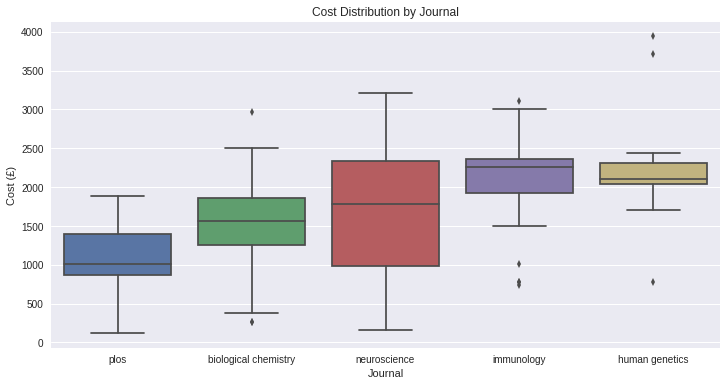

In [410]:
fig, ax = plt.subplots(figsize=(12,6));
z = sns.boxplot(x='clean_journals', y='cost', data=vis);
z.set_xlabel('Journal');
z.set_ylabel('Cost (£)');
z.set_title('Cost Distribution by Journal');


And, now, the numbers:

In [429]:
plos = df[df['clean_journals'] == 'plos']
mean = str(plos['cost'].mean())
print('the mean cost per article for PLoS is: £{}'.format(mean[:4]+'.'+mean[4:7]))
median = str(plos['cost'].median())
print('the median cost per article for PLoS is: £{}'.format(median[:4]+'.'+median[4:7]))
std = str(plos['cost'].std())
print('the standard deviation for article cost for PLoS is: £{}'.format(std[:3]+'.'+std[3:6]))

the mean cost per article for PLoS is: £1100.74.
the median cost per article for PLoS is: £1011.45.
the standard deviation for article cost for PLoS is: £344.81.


In [431]:
#Journal of Biological Chemistry

biochem = df[df['clean_journals'] == 'biological chemistry']
mean = str(biochem['cost'].mean())
print('the mean cost per article for the Journal of Biological Chemistry is: £{}'.format(mean[:4]+'.'+mean[4:7]))
median = str(biochem['cost'].median())
print('the median cost per article for the Journal of Biological Chemistry is: £{}'.format(median[:4]+'.'+median[4:7]))
std = str(biochem['cost'].std())
print('the standard deviation for article cost for the Journal of Biological Chemistry is: £{}'.format(std[:3]+'.'+std[3:6]))

the mean cost per article for the Journal of Biological Chemistry is: £1590.84.
the median cost per article for the Journal of Biological Chemistry is: £1566.89.
the standard deviation for article cost for the Journal of Biological Chemistry is: £500.96.


In [432]:
#Journal of Neuroscience

neurosci = df[df['clean_journals'] == 'neuroscience']
mean = str(neurosci['cost'].mean())
print('the mean cost per article for the Journal of Neuroscience is: £{}'.format(mean[:4]+'.'+mean[4:7]))
median = str(neurosci['cost'].median())
print('the median cost per article for the Journal of Neuroscience is: £{}'.format(median[:4]+'.'+median[4:7]))
std = str(neurosci['cost'].std())
print('the standard deviation for article cost for the Journal of Neuroscience is: £{}'.format(std[:3]+'.'+std[3:6]))

the mean cost per article for the Journal of Neuroscience is: £1714.87.
the median cost per article for the Journal of Neuroscience is: £1782.03.
the standard deviation for article cost for the Journal of Neuroscience is: £744.68.


In [433]:
#Journal of Immunology

imm = df[df['clean_journals'] == 'immunology']
mean = str(imm['cost'].mean())
print('the mean cost per article for the Journal of Immunology is: £{}'.format(mean[:4]+'.'+mean[4:7]))
median = str(imm['cost'].median())
print('the median cost per article for the Journal of Immunology is: £{}'.format(median[:4]+'.'+median[4:7]))
std = str(imm['cost'].std())
print('the standard deviation for article cost for the Journal of Immunology is: £{}'.format(std[:3]+'.'+std[3:6]))

the mean cost per article for the Journal of Immunology is: £2112.32.
the median cost per article for the Journal of Immunology is: £2262.82.
the standard deviation for article cost for the Journal of Immunology is: £608.70.


In [434]:
#American Journal of Human Genetics

gen = df[df['clean_journals'] == 'human genetics']
mean = str(gen['cost'].mean())
print('the mean cost per article for the American Journal of Human Genetics is: £{}'.format(mean[:4]+'.'+mean[4:7]))
median = str(gen['cost'].median())
print('the median cost per article for the American Journal of Human Genetics is: £{}'.format(median[:4]+'.'+median[4:7]))
std = str(gen['cost'].std())
print('the standard deviation for article cost for the American Journal of Human Genetics is: £{}'.format(std[:3]+'.'+std[3:6]))

the mean cost per article for the American Journal of Human Genetics is: £2169.16.
the median cost per article for the American Journal of Human Genetics is: £2100.00.
the standard deviation for article cost for the American Journal of Human Genetics is: £503.53.


<H3>Next time: What I Would Do Differently</H3>
I don't know if I treated the outliers appropriately, but I would definately look for an answer from WELLCOME or whoever provided me with the data about those.
Otherwise, the built-in tools of pandas made this part relatively easy- most of the cleaning was in the first part